In [23]:
"""
IUT Paul Sabatier
Département Informatique
BUT3 - R5.08 (AGED)
2023-2024
Contrôle 1
Durée 2h20
Le contrôle comporte deux parties : un QCM (20 minutes) + un Exercice
Documents autorisés
Exercice à réaliser de préférence sur un ordinateur. Le fichier produit doit être téléversé sur
Moodle (dans le dossier Contrôle1).
Exercice :
On souhaite mettre en place un modèle de machine learning capable de prédire le statut
tabagique (fumeur ou non fumeur) d'un patient à partir d'informations sur divers autres
indicateurs de santé et autre.
Les indicateurs sont listés dans le tableau ci-dessous.
Le dataset est sur Moodle (train.new.csv.zip), il comporte une centaine de milliers de
données vous pourrez l'exploiter comme vous le souhaitez.
Question 1 :
On vous demande de proposer d’indiquer le (vôtre) modèle d'apprentissage le plus optimal.
Votre solution doit au moins tester trois algorithmes différents (trois modèles de machine
learning).
Il sera tenu compte dans l'évaluation de toute la procédure que vous avez choisie pour :
- la préparation des données
- le choix des variables importantes/utiles (avec des visualisations de données
appropriées pour effectuer ces choix)
- le choix des modèles d'apprentissage
- la méthodologie d'évaluation
- le rendu des résultats des évaluations (les performances) des différentes solutions.
Le dataset comporte les données suivantes :
age âge :
sex sexe
height(cm) taille(cm)
country Pays
weight(kg) poids(kg)
waist(cm) : Waist circumference length taille(cm) : Tour de taille longueur
eyesight(left) vue (gauche)
eyesight(right) vue (droite)
hearing(left) ouïe(gauche)
hearing(right) ouïe(droite)
systolic : Blood pressure systolique : Pression artérielle
relaxation : Blood pressure relaxation : tension artérielle
fasting blood sugar glycémie à jeun
Cholesterol : total Cholestérol : total
triglyceride triglycérides
HDL : cholesterol type HDL : type de cholestérol
LDL : cholesterol type LDL : type de cholestérol
hemoglobin hémoglobine
Urine protein Protéines urinaires
serum creatinine créatinine sérique
AST : glutamic oxaloacetic transaminase type AST : type de transaminase glutamique
oxaloacétique
ALT : glutamic oxaloacetic transaminase type ALT : transaminase glutamique oxaloacétique
type
Gtp : γ-GTP Gtp : γ-GTP
dental caries caries dentaires
smoking tabagisme
Question 2 :
Donner la valeur prédite par votre algorithme optimal pour le patient ayant les indicateurs
suivants :
Id, 1891
age, 35
sex, M
country, usa
height(cm), 185
weight(kg), 80
waist(cm), 84.0
eyesight(left), 1.2
eyesight(right), 0.9
hearing(left), 1
hearing(right), 1
systolic 130
relaxation, 70
fasting blood sugar, 99
Cholesterol, 211
triglyceride, 210
HDL, 41
LDL, 127
hemoglobin, 15.6
Urine protein, 1
serum creatinine, 1.3
AST, 22
ALT, 13
Gtp, 21
dental caries 0
Valeurs en ligne pour copie/coller :
191 190 55 F usa 175 80 87.1 0.9 0.8 1 1 137
89 177 170 96 43 108 14.5 1 1.1 26 41 20 0
Question 3 (4pts) :
Le dataset a été modifié, plus précisément la colonne smoking (le statut tabagique) a été
affiné pour mieux séparer les statuts tabagiques certains de ceux qui ne le sont pas. Ainsi
au lieu d’avoir deux valeurs possibles (1 : fumeur, 0 : non fumeur), La colonne smoking
(statut tabagique) a été étendu à 3 valeurs possibles, de 0 à 2 (0: non fumeur, 1 : plutôt
fumeur, 2 : certainement fumeur).
Le nouveau fichier est : train.new.multi.csv.zip. Seule la colonne smoking a été modifiée.
Proposer une solution (modèle d’apprentissage) permettant de prédire ce nouveau statut
tabagique en fonction des indicateurs de santé d’un patient.
Quelle est la classe prédite pour le patient suivant (les valeurs ci-dessous sont listées dans le
même ordre que la liste du tableau ci-dessus.).:
481 60 M usa 160 65 78.0 0.8 0.7 1 1 118 62
97 154 88 37 100 12.6 1 0.5 23 14 9 0

Voici le code que j'ai pu écrire pour un autre travail : 
# # TP5.2 -  Exercice (Récap)
# On reprend le fichier titanic. La démarche qu'il faut suivre pour la mise en place d'un projet de machine learning est la suivante : 
# - Analyse des données du Dataset
#   - Analayse de la forme :
#       - Vérifier la taille du Dataset X
#       - Identifier les variables et les labels et leurs types
#       - Visualiser quelques données
#       - Analyser les données manquantes
#       
#  - Pré-traitement des données
#     - Elimination des colonnes inutiles
#     - Traiter es valeurs manquantes
#     - Encoder les colonnes non numériques
#     - Selection de variables utiles 
#     - Afficher (uniquement les courbes à deux dimensions, par exemple la colonne 4 `X[:, 3]`, en fonction de la colonne 3, `X[:, 2]`)
#     - Création des Train set et Test set 
#     - Normaliser des données des différentes colonnes 
# 
# - Définition du modèle de machine learning adéquat à la tâche (données)
# - Evaluation et calcul de performances (ATTENTION Il faut choisir la bonne métrique).
# 
# 
# ## Questions 
# En s'appuyant sur la démarche décrite ci-dessus, comparer les modèles dans les cas suivants :
# - donnéees normalisées versus non normalisées
# - données manquantes traitées versus non traitées
# sur les deux données normalisées et non normalisées et évaluation de leurs performances.
# - comparer différents (2 alogos d'apprentissage). <br>
# 
# PS :
# *** ATTENTION n'oubiez pas de normaliser aussi les données de test. 
# La normalisation des données ne peut se faire que sur les données d'apprentissage. 
# <span style="color:red"> Il ne faut jamais normaliser avant de spliter les données.
# Les données de test ne sont pas connues, un algo. d'apprentissage ne doit jamais utliser une quelconque donnée qui vient des données de test sinon **BIAIS*</span>
# 
# <span style="color:green"> La normalisatin doit donc utiliser le même modèle (```transformer```) que celui utilisé dans la phase d'apprentissage ET SURTOUT la même échelle.</span> 
# 
# Rappel : pour les données d'entrainement on uilise la méthode ```fit_tranform()```et pour les données de test, ```transform()```
# 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# ### 1 Le dataset
# - Lecture du Dataset et Analyse des données
def load_titanic() -> pd.DataFrame:

Load
the
titanic
dataset.
Returns:
DataFrame: the
titanic
dataset.

titanic = pd.read_csv('./data/titanic.csv')
return titanic

raw_titanic_data = load_titanic()
# #### Coup d'oeil rapide sur le contenu .head()
raw_titanic_data.head(3)
# #### Vérification taille, type des données 
# 
raw_titanic_data.info()
# #### Types variables
# #### Analyse des données manquantes  
# - Combien de valeurs manquantes (selon l'objet renvoyé, pandas ou numpy)
# - On peut caculer le pourcentage de valeurs manquantes  *data.isnull().sum()/data.shape[0])* 
raw_titanic_data.isna().sum()/raw_titanic_data.shape[0]*100
# #### Visualisation (Survived le label en fonction des variables)
sns.pairplot(raw_titanic_data, hue='Survived')
# #### Matrice de correlation 
sns.heatmap(raw_titanic_data.corr(), annot=True)
# ### 2. Pré-traitement des données 
# #### Elimination colonnes inutiles
# - Utiliser uniquement 'Survived', 'Pclass', 'Sex', 'Age', 'Fare'
titanic = raw_titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
X_features = ["Pclass", "Sex", "Age", "Fare"]
titanic["Sex"] = titanic['Sex'].replace(['male', 'female'], [0, 1])
titanic.head(3)


# #### Traiter les valeurs manquantes
# - Deux cas : utiliser un imputer ou supprimer toutes les lignes vides
#Avant quoique ce soit on sépare les données en train et test
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.2, random_state=42)

train_without_nan = train.dropna()
test_without_nan = test.dropna() #dropna supprime les lignes qui ont des valeurs manquantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
imputer.fit(train[X_features]) # le imputer sert a remplacer les valeurs manquantes par la moyenne
y_with_all_values = train["Survived"]
y_test_with_all_values = test["Survived"]
train_imputed = imputer.transform(train[X_features])
test_imputed = imputer.transform(test[X_features])


# #### Encodage des données non numériques ?
#Pas besoin l'encodage des données non numériques car on a déjà fait le remplacement des valeurs sexes
# mais pour encoder on utilise la méthode LabelEncoder
# #### Normalisation 
# Attention la normalisation à la normalisation des données de test.
#Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_imputed)
train_scaled_imputed = scaler.transform(train_imputed)
test_scaled_imputed = scaler.transform(test_imputed)

train_scaled_imputed
# ### Pré-processing des données


# #### Visualisation de de queques données (normalisées et non non normalisées) ?
plt.scatter(range(0, len(train_scaled_imputed[:,2])), train_scaled_imputed[:,2])
plt.scatter(range(0,len(train["Age"])), train["Age"])
plt.title("Age")

plt.scatter(range(0, len(train_scaled_imputed[:,3])), train_scaled_imputed[:,3])
plt.scatter(range(0,len(train["Fare"])), train["Fare"])
plt.scatter(range(0, len(train_scaled_imputed[:,0])), train_scaled_imputed[:,0])
plt.scatter(range(0,len(train["Pclass"])), train["Pclass"])
plt.title("Pclass")
plt.scatter(range(0, len(train_scaled_imputed[:,1])), train_scaled_imputed[:,1])
plt.scatter(range(0,len(train["Sex"])), train["Sex"])

# ## Modélisation
#Modelisation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
n=5
log_reg = KNeighborsClassifier(n_neighbors=n)
log_reg_naive = KNeighborsClassifier(n_neighbors=n)
# ### Entrainement
log_reg_naive.fit(train_without_nan[X_features],train_without_nan["Survived"]) # no préprocessing (pas de normalisation, pas de traitement des valeurs manquantes)
log_reg.fit(train_scaled_imputed, y_with_all_values) # préprocessing : normalisation et traitement des valeurs manquantes
# pour normaliser -> fit_transform sur les données d'entrainement avec le scaler
# pour les valeurs manquantes -> fit sur les données d'entrainement avec l'imputer
# ### Evaluation du modèle
log_reg_naive.score(test_without_nan[X_features], test_without_nan["Survived"])
# 
log_reg.score(test_scaled_imputed, y_test_with_all_values) 
# modèle pour la classification

Logistic
Regression: sklearn.linear_model.LogisticRegression
Decision
Trees: sklearn.tree.DecisionTreeClassifier
Random
Forest: sklearn.ensemble.RandomForestClassifier
Support
Vector
Machines(SVM): sklearn.svm.SVC
k - Nearest
Neighbors(k - NN): sklearn.neighbors.KNeighborsClassifier
Naive
Bayes: sklearn.naive_bayes.GaussianNB(
for Gaussian Naive Bayes) or sklearn.naive_bayes.MultinomialNB ( for Multinomial Naive Bayes)
Gradient
Boosting: sklearn.ensemble.GradientBoostingClassifier
AdaBoost: sklearn.ensemble.AdaBoostClassifier
Neural
Networks: sklearn.neural_network.MLPClassifier
Linear
Discriminant
Analysis(LDA): sklearn.discriminant_analysis.LinearDiscriminantAnalysis
Quadratic
Discriminant
Analysis(QDA): sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
Stochastic
Gradient
Descent(SGD): sklearn.linear_model.SGDClassifier
Ridge
Classifier: sklearn.linear_model.RidgeClassifier
Perceptron: sklearn.linear_model.Perceptron

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
# Make a function that fit and score a list of models on a given dataset
def fit_and_score(models, X_train, y_train, X_test, y_test):

Fit and score
a
list
of
models
on
a
given
dataset
Args:
models(list): a
list
of
models
X_train(DataFrame): the
training
set
y_train(Series): the
training
labels
X_test(DataFrame): the
test
set
y_test(Series): the
test
labels

for model in models:
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__} score: {model.score(X_test, y_test)}")
models = [
KNeighborsClassifier(n_neighbors=5),  # Adjust n_neighbors as needed
LogisticRegression(max_iter=1000),  # Adjust max_iter as needed
RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),  # Adjust n_estimators and max_depth as needed
SVC(C=1, kernel='rbf', gamma='scale'),  # Adjust C, kernel, and gamma as needed
MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),  # Adjust hidden_layer_sizes and max_iter as needed
DecisionTreeClassifier(max_depth=5, random_state=42),  # Adjust max_depth as needed
GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),  # Adjust n_estimators, learning_rate, and max_depth as needed
AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),  # Adjust n_estimators and learning_rate as needed
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
SGDClassifier(max_iter=1000, random_state=42),  # Adjust max_iter as needed
RidgeClassifier(),
Perceptron(max_iter=1000, random_state=42),  # Adjust max_iter as needed
LinearRegression()
]
fit_and_score(models, train_scaled_imputed, y_with_all_values, test_scaled_imputed, y_test_with_all_values)
# Models pour la régression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

models = [ #models de regression
LinearRegression(),
Lasso(),
Ridge(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
SVR(),
KNeighborsRegressor(),
ElasticNet(),
HuberRegressor(),
TheilSenRegressor()
]

fit_and_score(models, train_scaled_imputed, y_with_all_values, test_scaled_imputed, y_test_with_all_values)
"""

'\nIUT Paul Sabatier\nDépartement Informatique\nBUT3 - R5.08 (AGED)\n2023-2024\nContrôle 1\nDurée 2h20\nLe contrôle comporte deux parties : un QCM (20 minutes) + un Exercice\nDocuments autorisés\nExercice à réaliser de préférence sur un ordinateur. Le fichier produit doit être téléversé sur\nMoodle (dans le dossier Contrôle1).\nExercice :\nOn souhaite mettre en place un modèle de machine learning capable de prédire le statut\ntabagique (fumeur ou non fumeur) d\'un patient à partir d\'informations sur divers autres\nindicateurs de santé et autre.\nLes indicateurs sont listés dans le tableau ci-dessous.\nLe dataset est sur Moodle (train.new.csv.zip), il comporte une centaine de milliers de\ndonnées vous pourrez l\'exploiter comme vous le souhaitez.\nQuestion 1 :\nOn vous demande de proposer d’indiquer le (vôtre) modèle d\'apprentissage le plus optimal.\nVotre solution doit au moins tester trois algorithmes différents (trois modèles de machine\nlearning).\nIl sera tenu compte dans l\'éval

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score


In [25]:
train = pd.read_csv('./train.new.csv')
#print nombre de lignes : 
print(train.shape[0])
train.head()

159255


,id,age,sex,country,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,M,usa,165,60,81.0,0.5,0.6,1,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,NaN,usa,165,65,89.0,0.6,0.7,2,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,M,usa,170,75,81.0,0.4,0.5,1,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,F,usa,180,95,105.0,1.5,1.2,1,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,M,usa,165,60,80.5,1.5,1.0,1,...,44,93,15.4,1,0.8,19,13,17,0,1


In [26]:
train.head()
#train.info()

"""<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159255 entries, 0 to 159254
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159255 non-null  int64  
 1   age                  159255 non-null  int64  
 2   sex                  136625 non-null  object 
 3   country              159255 non-null  object 
 4   height(cm)           159255 non-null  int64  
 5   weight(kg)           159255 non-null  int64  
 6   waist(cm)            159255 non-null  float64
 7   eyesight(left)       159255 non-null  float64
 8   eyesight(right)      159255 non-null  float64
 9   hearing(left)        159255 non-null  int64  
 10  hearing(right)       159255 non-null  int64  
 11  systolic             159255 non-null  int64  
 12  relaxation           159255 non-null  int64  
 13  fasting blood sugar  159255 non-null  int64  
 14  Cholesterol          159255 non-null  int64  
 15  triglyceride         159255 non-null  int64  
 16  HDL                  159255 non-null  int64  
 17  LDL                  159255 non-null  int64  
 18  hemoglobin           159255 non-null  float64
 19  Urine protein        159255 non-null  int64  
 20  serum creatinine     159255 non-null  float64
 21  AST                  159255 non-null  int64  
 22  ALT                  159255 non-null  int64  
 23  Gtp                  159255 non-null  int64  
 24  dental caries        159255 non-null  int64  
 25  smoking              159255 non-null  int64  
dtypes: float64(5), int64(19), object(2)
memory usage: 31.6+ MB
"""

"<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 159255 entries, 0 to 159254\nData columns (total 26 columns):\n #   Column               Non-Null Count   Dtype  \n---  ------               --------------   -----  \n 0   id                   159255 non-null  int64  \n 1   age                  159255 non-null  int64  \n 2   sex                  136625 non-null  object \n 3   country              159255 non-null  object \n 4   height(cm)           159255 non-null  int64  \n 5   weight(kg)           159255 non-null  int64  \n 6   waist(cm)            159255 non-null  float64\n 7   eyesight(left)       159255 non-null  float64\n 8   eyesight(right)      159255 non-null  float64\n 9   hearing(left)        159255 non-null  int64  \n 10  hearing(right)       159255 non-null  int64  \n 11  systolic             159255 non-null  int64  \n 12  relaxation           159255 non-null  int64  \n 13  fasting blood sugar  159255 non-null  int64  \n 14  Cholesterol          159255 non-null  int64  \n 

In [27]:
# préprocessing des données
# On supprime les colonnes inutiles
#on constate que toutes les données sont numériques sauf le sexe et le pays
# affichage tout pays distincts
#distinctcountry = train['country'].unique()
#print(distinctcountry) (il n y a qu'un seul pays donc on peux virer la donnée vu qu'elle ne varie pas.)
train = train.drop(['id', 'country'], axis=1)
#train.head()

In [28]:
# on regarde si il manque des valeurs
train.isna().sum() #essentiellement des valeurs manquantes pour le sexe
# supression des lignes avec des valeurs manquantes
train = train.dropna()
train.isna().sum()

age                    0
sex                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [29]:
# pas besoin d'encoder les données non numériques car elles sont toutes numériques

In [30]:
# on sépare les données en train et test 
# est-ce que la personne fume ou pas
X = train.drop(['smoking'], axis=1)
y = train['smoking']
# on sépare les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['sex'] = le.fit_transform(X_train['sex'])
X_test['sex'] = le.fit_transform(X_test['sex'])
print(X_test['sex'])
print(X_train['sex'])

5330      0
3173      1
155396    1
51113     1
87838     0
         ..
64302     0
32443     0
45643     0
95101     1
82865     1
Name: sex, Length: 27325, dtype: int32
19006     1
135531    0
65106     1
46672     0
124608    1
         ..
128490    1
139738    0
120869    1
153785    0
142180    1
Name: sex, Length: 109300, dtype: int32


In [31]:
# on normalise les données pour accélérer le processus d'apprentissage
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# on va tester plusieurs modèles pour voir lequel est le plus performant

In [33]:
models = [ # models de classification car on cherche à savoir si la personne fume ou pas
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=5),
    #DecisionTreeClassifier(),
    RandomForestClassifier()
    #AdaBoostClassifier(),
    #MLPClassifier(max_iter=1000),
    #SVC(),
    #GaussianNB()
]
def fit_and_score(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__} score: {model.score(X_test, y_test)}")
        
fit_and_score(models, X_train_scaled, y_train, X_test_scaled, y_test) # le code met beaucoup de temps à s'exécuter

LogisticRegression score: 0.7474473924977127
KNeighborsClassifier score: 0.7234034766697164
RandomForestClassifier score: 0.7717840805123514


In [34]:
"""LogisticRegression score: 0.7474473924977127
KNeighborsClassifier score: 0.7234034766697164
DecisionTreeClassifier score: 0.6905032021957914
RandomForestClassifier score: 0.7701372369624886
AdaBoostClassifier score: 0.7640256175663312
MLPClassifier score: 0.7656724611161939"""

'LogisticRegression score: 0.7474473924977127\nKNeighborsClassifier score: 0.7234034766697164\nDecisionTreeClassifier score: 0.6905032021957914\nRandomForestClassifier score: 0.7701372369624886\nAdaBoostClassifier score: 0.7640256175663312\nMLPClassifier score: 0.7656724611161939'

In [35]:
# on va essayer de trouver les meilleurs paramètres pour le modèle de random forest


In [36]:
n_estimator = 10
rfc = RandomForestClassifier(n_estimator)
rfc.fit(X_train_scaled, y_train)
rfc.score(X_test_scaled, y_test) 

0.7404574565416285

In [37]:
y_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test, y_pred)
print(score)

0.7404574565416285


In [38]:
from sklearn.metrics import precision_score, recall_score
# test avec Random Forest
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators=10)

# Train
model_random_forest.fit(X_train, y_train)

# predict sur X_train
y_pred_random_forest = model_random_forest.predict(X_train)

# on calcule le score
score_random_forest = model_random_forest.score(X_train, y_train)

print("score sur X_train: ", score_random_forest)
print('Accuracy sur le train :', accuracy_score(y_train, y_pred_random_forest))
print('Precision sur le train :', precision_score(y_train, y_pred_random_forest))
print('F1  sur le train :', f1_score(y_train, y_pred_random_forest))
print('Recall sur le train :', recall_score(y_train, y_pred_random_forest))

"""score sur X_train:  0.989341262580055
Accuracy sur le train : 0.989341262580055
Precision sur le train : 0.9936802502536355
F1  sur le train : 0.9877614480360538
Recall sur le train : 0.9819127383612858"""

score sur X_train:  0.9900365965233303
Accuracy sur le train : 0.9900365965233303
Precision sur le train : 0.9928998820158436
F1  sur le train : 0.9885780812435104
Recall sur le train : 0.9842937404707701


'score sur X_train:  0.989341262580055\nAccuracy sur le train : 0.989341262580055\nPrecision sur le train : 0.9936802502536355\nF1  sur le train : 0.9877614480360538\nRecall sur le train : 0.9819127383612858'

In [39]:
# predict sur X_test
y_pred_random_forest = model_random_forest.predict(X_test)

# on calcule le score
score_random_forest = model_random_forest.score(X_test, y_test)

print("score sur X_test: ", score_random_forest)
print('Accuracy sur le test :', accuracy_score(y_test, y_pred_random_forest))
print('Precision sur le test :', precision_score(y_test, y_pred_random_forest))
print('F1  sur le test :', f1_score(y_test, y_pred_random_forest))
print('Recall sur le test :', recall_score(y_test, y_pred_random_forest))
"""score sur X_test:  0.7414455626715462
Accuracy sur le test : 0.7414455626715462
Precision sur le test : 0.7130025289962502
F1  sur le test : 0.6982961096639194
Recall sur le test : 0.68418410041841"""

score sur X_test:  0.744007319304666
Accuracy sur le test : 0.744007319304666
Precision sur le test : 0.7132650426099681
F1  sur le test : 0.7031866593117495
Recall sur le test : 0.6933891213389122


'score sur X_test:  0.7414455626715462\nAccuracy sur le test : 0.7414455626715462\nPrecision sur le test : 0.7130025289962502\nF1  sur le test : 0.6982961096639194\nRecall sur le test : 0.68418410041841'

<AxesSubplot:>

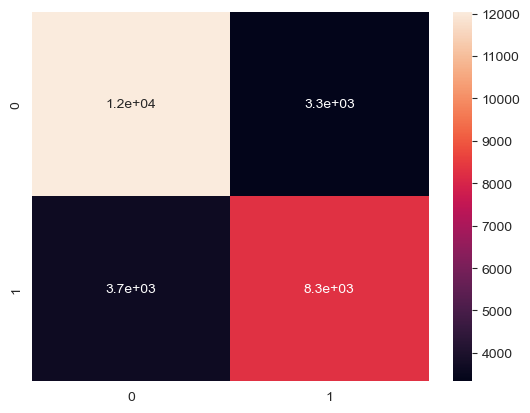

In [40]:
# matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_random_forest)
# On calcule la matrice de confusion (on utilise le result de random forest qui est le plus performant)
cm = confusion_matrix(y_test, y_pred_random_forest)
# affichage
sns.heatmap(cm, annot=True)

In [41]:
# Partie 2 :
# Donner la valeur prédite par votre algorithme optimal pour le patient ayant les indicateurs suivants :
""" 
Id, 1891
age, 35
sex, M
country, usa
height(cm), 185
weight(kg), 80
waist(cm), 84.0
eyesight(left), 1.2
eyesight(right), 0.9
hearing(left), 1
hearing(right), 1
systolic 130
relaxation, 70
fasting blood sugar, 99
Cholesterol, 211
triglyceride, 210
HDL, 41
LDL, 127
hamoglobin, 15.6
Urine protein, 1
serum creatinine, 1.3
AST, 22
ALT, 13
Gtp, 21
dental caries 0
"""

' \nId, 1891\nage, 35\nsex, M\ncountry, usa\nheight(cm), 185\nweight(kg), 80\nwaist(cm), 84.0\neyesight(left), 1.2\neyesight(right), 0.9\nhearing(left), 1\nhearing(right), 1\nsystolic 130\nrelaxation, 70\nfasting blood sugar, 99\nCholesterol, 211\ntriglyceride, 210\nHDL, 41\nLDL, 127\nhamoglobin, 15.6\nUrine protein, 1\nserum creatinine, 1.3\nAST, 22\nALT, 13\nGtp, 21\ndental caries 0\n'

In [42]:
patient = pd.DataFrame({
    'Id': [1891],
    'age': [35],
    'sex': ['M'],
    'country': ['usa'],
    'height(cm)': [185],
    'weight(kg)': [80],
    'waist(cm)': [84.0],
    'eyesight(left)': [1.2],
    'eyesight(right)': [0.9],
    'hearing(left)': [1],
    'hearing(right)': [1],
    'systolic': [130],
    'relaxation': [70],
    'fasting blood sugar': [99],
    'Cholesterol': [211],
    'triglyceride': [210],
    'HDL': [41],
    'LDL': [127],
    'hemoglobin': [15.6],
    'Urine protein': [1],
    'serum creatinine': [1.3],
    'AST': [22],
    'ALT': [13],
    'Gtp': [21],
    'dental caries': [0]
})
print(patient)
"""Valeurs en ligne pour copie/coller :
191 190 55 F usa 175 80 87.1 0.9 0.8 1 1 137
89 177 170 96 43 108 14.5 1 1.1 26 41 20 0"""

     Id  age sex country  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  1891   35   M     usa         185          80       84.0             1.2   

   eyesight(right)  hearing(left)  ...  triglyceride  HDL  LDL  hemoglobin  \
0              0.9              1  ...           210   41  127        15.6   

   Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  
0              1               1.3   22   13   21              0  

[1 rows x 25 columns]


'Valeurs en ligne pour copie/coller :\n191 190 55 F usa 175 80 87.1 0.9 0.8 1 1 137\n89 177 170 96 43 108 14.5 1 1.1 26 41 20 0'

In [43]:
# on supprime les colonnes inutiles enlevez les # pour executer
patient = patient.drop(['Id', 'country'], axis=1)
# on transforme le sex en 0,1 avec label encoder
patient['sex'] = le.transform(patient['sex'])
patient.head()

,age,sex,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,35,1,185,80,84.0,1.2,0.9,1,1,130,...,210,41,127,15.6,1,1.3,22,13,21,0


In [44]:
# prédire si le patient fume ou pas
patient_df_scaled = scaler.transform(patient)
prediction = model_random_forest.predict(patient_df_scaled)
statut_tabagique = ['non fumeur', 'fumeur']
patient_df_scaled = scaler.transform(patient)
print("Statut tabagique prédit:", statut_tabagique[prediction[0]])


Statut tabagique prédit: non fumeur


C:\Users\Baran\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
"""Question 3 (4pts) :
Le dataset a été modifié, plus précisément la colonne smoking (le statut tabagique) a été
affiné pour mieux séparer les statuts tabagiques certains de ceux qui ne le sont pas. Ainsi
au lieu d’avoir deux valeurs possibles (1 : fumeur, 0 : non fumeur), La colonne smoking
(statut tabagique) a été étendu à 3 valeurs possibles, de 0 à 2 (0: non fumeur, 1 : plutôt
fumeur, 2 : certainement fumeur).
Le nouveau fichier est : train.new.multi.csv.zip. Seule la colonne smoking a été modifiée.
Proposer une solution (modèle d’apprentissage) permettant de prédire ce nouveau statut
tabagique en fonction des indicateurs de santé d’un patient.
Quelle est la classe prédite pour le patient suivant (les valeurs ci-dessous sont listées dans le
même ordre que la liste du tableau ci-dessus.).:
481 60 M usa 160 65 78.0 0.8 0.7 1 1 118 62
97 154 88 37 100 12.6 1 0.5 23 14 9 0"""


'Question 3 (4pts) :\nLe dataset a été modifié, plus précisément la colonne smoking (le statut tabagique) a été\naffiné pour mieux séparer les statuts tabagiques certains de ceux qui ne le sont pas. Ainsi\nau lieu d’avoir deux valeurs possibles (1 : fumeur, 0 : non fumeur), La colonne smoking\n(statut tabagique) a été étendu à 3 valeurs possibles, de 0 à 2 (0: non fumeur, 1 : plutôt\nfumeur, 2 : certainement fumeur).\nLe nouveau fichier est : train.new.multi.csv.zip. Seule la colonne smoking a été modifiée.\nProposer une solution (modèle d’apprentissage) permettant de prédire ce nouveau statut\ntabagique en fonction des indicateurs de santé d’un patient.\nQuelle est la classe prédite pour le patient suivant (les valeurs ci-dessous sont listées dans le\nmême ordre que la liste du tableau ci-dessus.).:\n481 60 M usa 160 65 78.0 0.8 0.7 1 1 118 62\n97 154 88 37 100 12.6 1 0.5 23 14 9 0'

In [49]:
# Chargement du dataset
train_multi = pd.read_csv('./train.new.multi.csv')

# Pré-traitement
train_multi = train_multi.drop(['id', 'country'], axis=1)
train_multi.dropna(inplace=True)
train_multi['sex'] = LabelEncoder().fit_transform(train_multi['sex'])

# Séparation des features et du label
X_multi = train_multi.drop('smoking', axis=1)
y_multi = train_multi['smoking']

# Séparation en ensembles d'entraînement et de test
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Normalisation
scaler_multi = StandardScaler().fit(X_train_multi)
X_train_scaled_multi = scaler_multi.transform(X_train_multi)
X_test_scaled_multi = scaler_multi.transform(X_test_multi)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train_scaled_multi, y_train_multi)

# Évaluation du modèle
y_pred = model.predict(X_test_scaled_multi)
print('Accuracy:', accuracy_score(y_test_multi, y_pred))
print('Precision:', precision_score(y_test_multi, y_pred, average='weighted'))
print('Recall:', recall_score(y_test_multi, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test_multi, y_pred, average='weighted'))

# Prédiction pour le patient spécifique 

# probleme pour transformer M -> 0 et F -> 1
patient_df = {
    'age': [60],
    'sex': ['M'],
    'height(cm)': [160],
    'weight(kg)': [65],
    'waist(cm)': [78.0],
    'eyesight(left)': [0.8],
    'eyesight(right)': [0.7],
    'hearing(left)': [1],
    'hearing(right)': [1],
    'systolic': [118],
    'relaxation': [62],
    'fasting blood sugar': [97],
    'Cholesterol': [154],
    'triglyceride': [88],
    'HDL': [37],
    'LDL': [100],
    'hemoglobin': [12.6],
    'Urine protein': [1],
    'serum creatinine': [0.5],
    'AST': [23],
    'ALT': [14],
    'Gtp': [9],
    'dental caries': [0]
}
le_sex = LabelEncoder()
le_sex.fit_transform(train_multi['sex'])

patient_df = pd.DataFrame.from_dict(patient_df)
patient_df['sex'] = le_sex.transform(patient_df['sex'])
patient_scaled = scaler_multi.transform(patient_df)
patient_prediction = model.predict(patient_scaled)
# Affichage de la prédiction
statut_tabagique = ['non fumeur', 'plutôt fumeur', 'certainement fumeur']
print("Statut tabagique prédit pour le patient:", statut_tabagique[patient_prediction[0]])




Accuracy: 0.5257822506861848
Precision: 0.4763983856150024
Recall: 0.5257822506861848
F1 Score: 0.48644772337572567


ValueError: invalid literal for int() with base 10: 'M'

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_scores[model.__class__.__name__] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        }
    return model_scores

# Initialisation des modèles multi-classes
models = [
    RandomForestClassifier(n_estimators=100),
    SVC(probability=True),
    GradientBoostingClassifier(n_estimators=100),
    MLPClassifier(max_iter=1000),
    LogisticRegression(max_iter=1000, multi_class='ovr'),
    KNeighborsClassifier(n_neighbors=5),
    AdaBoostClassifier(n_estimators=100)
]

# Entraînement et évaluation des modèles
model_scores = fit_and_score(models, X_train_scaled_multi, y_train_multi, X_test_scaled_multi, y_test_multi)

# Sélectionner le modèle avec le meilleur score (par exemple, F1 Score)
best_model_name = max(model_scores, key=lambda k: model_scores[k]['F1 Score'])
best_model = [model for model in models if model.__class__.__name__ == best_model_name][0]

# Utiliser le meilleur modèle pour la prédiction du patient spécifique
best_model.fit(X_train_scaled_multi, y_train_multi)
patient_prediction = best_model.predict(patient_scaled)
print("Statut tabagique prédit pour le patient:", statut_tabagique[patient_prediction[0]])
